rentalhousev52_bom.csvは、2月17日に用意した元データ(rental_house_base.csv)に、以下の処理を施したもの。

家賃が200000以下のものを残し、それ以外を削除した。

id 20927は面積が異常に大きいので、削除した。

以下を削除した。(最寄駅徒歩分数、最寄路線名、駅名、路線名、方角、所在階数字、駐車場、周辺環境。)

区名を、平均地価に変換した。

間取りを、部屋数、L,D,Kに分解して二値化した。間取り自体は削除した。Sは相関係数が低かったので削除した。

バストイレに関するデータ（シャワー～共同バス）のうち、賃料と相関が高いもの6つ中いくつあるかを、バストイレランクとしてまとめた。
（相関係数0.4以上、具体的には以下。温水洗浄便座、洗面台独立、脱衣所、追焚機能、浴室乾燥機、バス・トイレ別。）
その後、バストイレランク以外の全てを削除した。

キッチンに関するデータ（IHコンロ～冷蔵庫あり）のうち、賃料と相関が高いもの3つ中いくつあるか、逆相関が高いものがいくつあるかを、キッチンランクとしてまとめた。
（相関係数0.3以上、具体的には以下。コンロ3口、システムキッチン、カウンターキッチン。逆相関-0.28、コンロ1口。）
その後、キッチンランク以外の全てを削除した。

通信に関するデータ（BSアンテナ～高速インターネット）のうち、賃料と相関が高いのはBSアンテナ、CSアンテナだけだった。
BSアンテナとCSアンテナの相関係数は0.7だったので、BSアンテナのみを残し、CSアンテナ、およびそれ以外の通信に関するデータを削除した。

設備に関するデータ（24時間換気～バリアフリー）のうち、賃料と相関が高いもの6つ中いくつあるかを、設備ランクとしてまとめた。
（相関係数0.2～0.9、具体的には以下。24時間換気システム、床暖房、室内洗濯機置場、タイル張り、ウォークインクローゼット、シューズボックス、バルコニー、敷地内ごみ置き場。）
エレベーターだけは相関係数0.44と高かったので、他の設備とは独立させて残した。

建物構造のうち、賃料との相関が高かったRC（鉄筋コンクリート）（0.35）、逆相関が高かった木造（-0.33）を残して二値化し、それ以外を削除した。

rentalhousev57_bom.csvでは、rentalhousev52_bom.csvに対して、excelおよびPythonで、以下を行った。

部屋数を削除、L,D,KをK, DK, LDKにまとめた。

エレベーター、BSアンテナを削除した。（偏回帰係数がマイナスに出て、解釈不能なため。）

In [1]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv('./rentalhousev57_bom.csv')

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 610)

In [3]:
df.head(3)

,id,賃料,区名,区名地価変換,最寄駅徒歩分数,部屋数,L,D,K,S,LDK,DK,R,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,BSアンテナ,エレベーター,設備ランク,設備ランクエレベータ込み,設備ランクエレベータBS込み,RC（鉄筋コンクリート）,木造
0,1,75000,北区,68,4,1,0,0,1,0,0,0,0,117,20.01,12,3,1,1,1,4,5,6,1,0
1,2,76000,中央区,610,5,1,0,0,0,0,0,0,1,538,16.50,10,1,1,0,1,5,6,6,0,0
2,3,110000,渋谷区,392,6,1,0,0,1,0,0,0,0,102,22.05,15,5,1,1,1,6,7,8,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28612 entries, 0 to 28611
Data columns (total 25 columns):
id                28612 non-null int64
賃料                28612 non-null int64
区名                28612 non-null object
区名地価変換            28612 non-null int64
最寄駅徒歩分数           28612 non-null int64
部屋数               28612 non-null int64
L                 28612 non-null int64
D                 28612 non-null int64
K                 28612 non-null int64
S                 28612 non-null int64
LDK               28612 non-null int64
DK                28612 non-null int64
R                 28612 non-null int64
築総月数              28612 non-null int64
面積数字              28612 non-null float64
何階建数字             28612 non-null int64
バストイレランク          28612 non-null int64
キッチンランク           28612 non-null int64
BSアンテナ            28612 non-null int64
エレベーター            28612 non-null int64
設備ランク             28612 non-null int64
設備ランクエレベータ込み      28612 non-null int64
設備ランクエレベータBS込み    28612 non-nu

それぞれの値がどの程度、他の値と相関があるのかを確認する。

In [5]:
df.corr()

,id,賃料,区名地価変換,最寄駅徒歩分数,部屋数,L,D,K,S,LDK,DK,R,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,BSアンテナ,エレベーター,設備ランク,設備ランクエレベータ込み,設備ランクエレベータBS込み,RC（鉄筋コンクリート）,木造
id,1.000000,-0.007777,-0.003834,-0.001047,-0.007706,-0.000740,-0.006771,-0.007548,0.006153,-0.000886,-0.008224,0.007548,0.000739,-0.006097,-0.005407,0.000763,0.003020,-0.003350,-0.002998,0.003476,0.002249,0.001285,-0.004345,0.006364
賃料,-0.007777,1.000000,0.334505,-0.162241,0.238328,0.585090,0.526550,0.261798,0.105474,0.584870,0.027295,-0.261798,-0.377842,0.663161,0.479279,0.649431,0.623619,0.276563,0.449483,0.479250,0.519167,0.519429,0.359891,-0.339367
区名地価変換,-0.003834,0.334505,1.000000,-0.258522,-0.176317,-0.017885,-0.064533,-0.038559,-0.027073,-0.017855,-0.067217,0.038559,-0.091652,-0.073733,0.378910,0.157285,0.101743,0.144702,0.291029,0.250780,0.285197,0.283809,0.157299,-0.163819
最寄駅徒歩分数,-0.001047,-0.162241,-0.258522,1.000000,0.226229,0.093418,0.137517,0.079158,0.025441,0.093529,0.077400,-0.079158,0.070725,0.174770,-0.283396,-0.067709,-0.022523,-0.084244,-0.269309,-0.145023,-0.189406,-0.185969,-0.219753,0.177353
部屋数,-0.007706,0.238328,-0.176317,0.226229,1.000000,0.246406,0.451795,0.211331,0.037520,0.246509,0.326400,-0.211331,0.290181,0.699296,-0.103658,0.012378,0.099712,-0.110925,-0.075193,-0.047899,-0.059224,-0.076091,-0.067715,-0.022717
L,-0.000740,0.585090,-0.017885,0.093418,0.246406,1.000000,0.702546,0.250633,0.105898,0.999801,-0.223982,-0.250633,-0.133861,0.680594,0.095717,0.344593,0.504328,0.095552,0.095478,0.190114,0.185875,0.185234,0.045933,-0.092826
D,-0.006771,0.526550,-0.064533,0.137517,0.451795,0.702546,1.000000,0.356575,0.086293,0.702751,0.535996,-0.356575,0.061069,0.745434,0.017700,0.261669,0.383555,0.015757,0.018830,0.109789,0.098543,0.090800,0.000482,-0.093337
K,-0.007548,0.261798,-0.038559,0.079158,0.211331,0.250633,0.356575,1.000000,0.049338,0.250584,0.191123,-1.000000,-0.077973,0.351154,0.057206,0.250186,0.229262,0.110827,0.106881,0.172446,0.173516,0.177505,0.065190,-0.135778
S,0.006153,0.105474,-0.027073,0.025441,0.037520,0.105898,0.086293,0.049338,1.000000,0.104345,-0.005608,-0.049338,-0.018911,0.158696,0.024435,0.068877,0.092118,-0.009352,0.010478,0.027599,0.026164,0.021237,0.000786,-0.013931
LDK,-0.000886,0.584870,-0.017855,0.093529,0.246509,0.999801,0.702751,0.250584,0.104345,1.000000,-0.223937,-0.250584,-0.133739,0.680444,0.095675,0.344392,0.504333,0.095533,0.095483,0.189873,0.185671,0.185049,0.045951,-0.092757


In [6]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

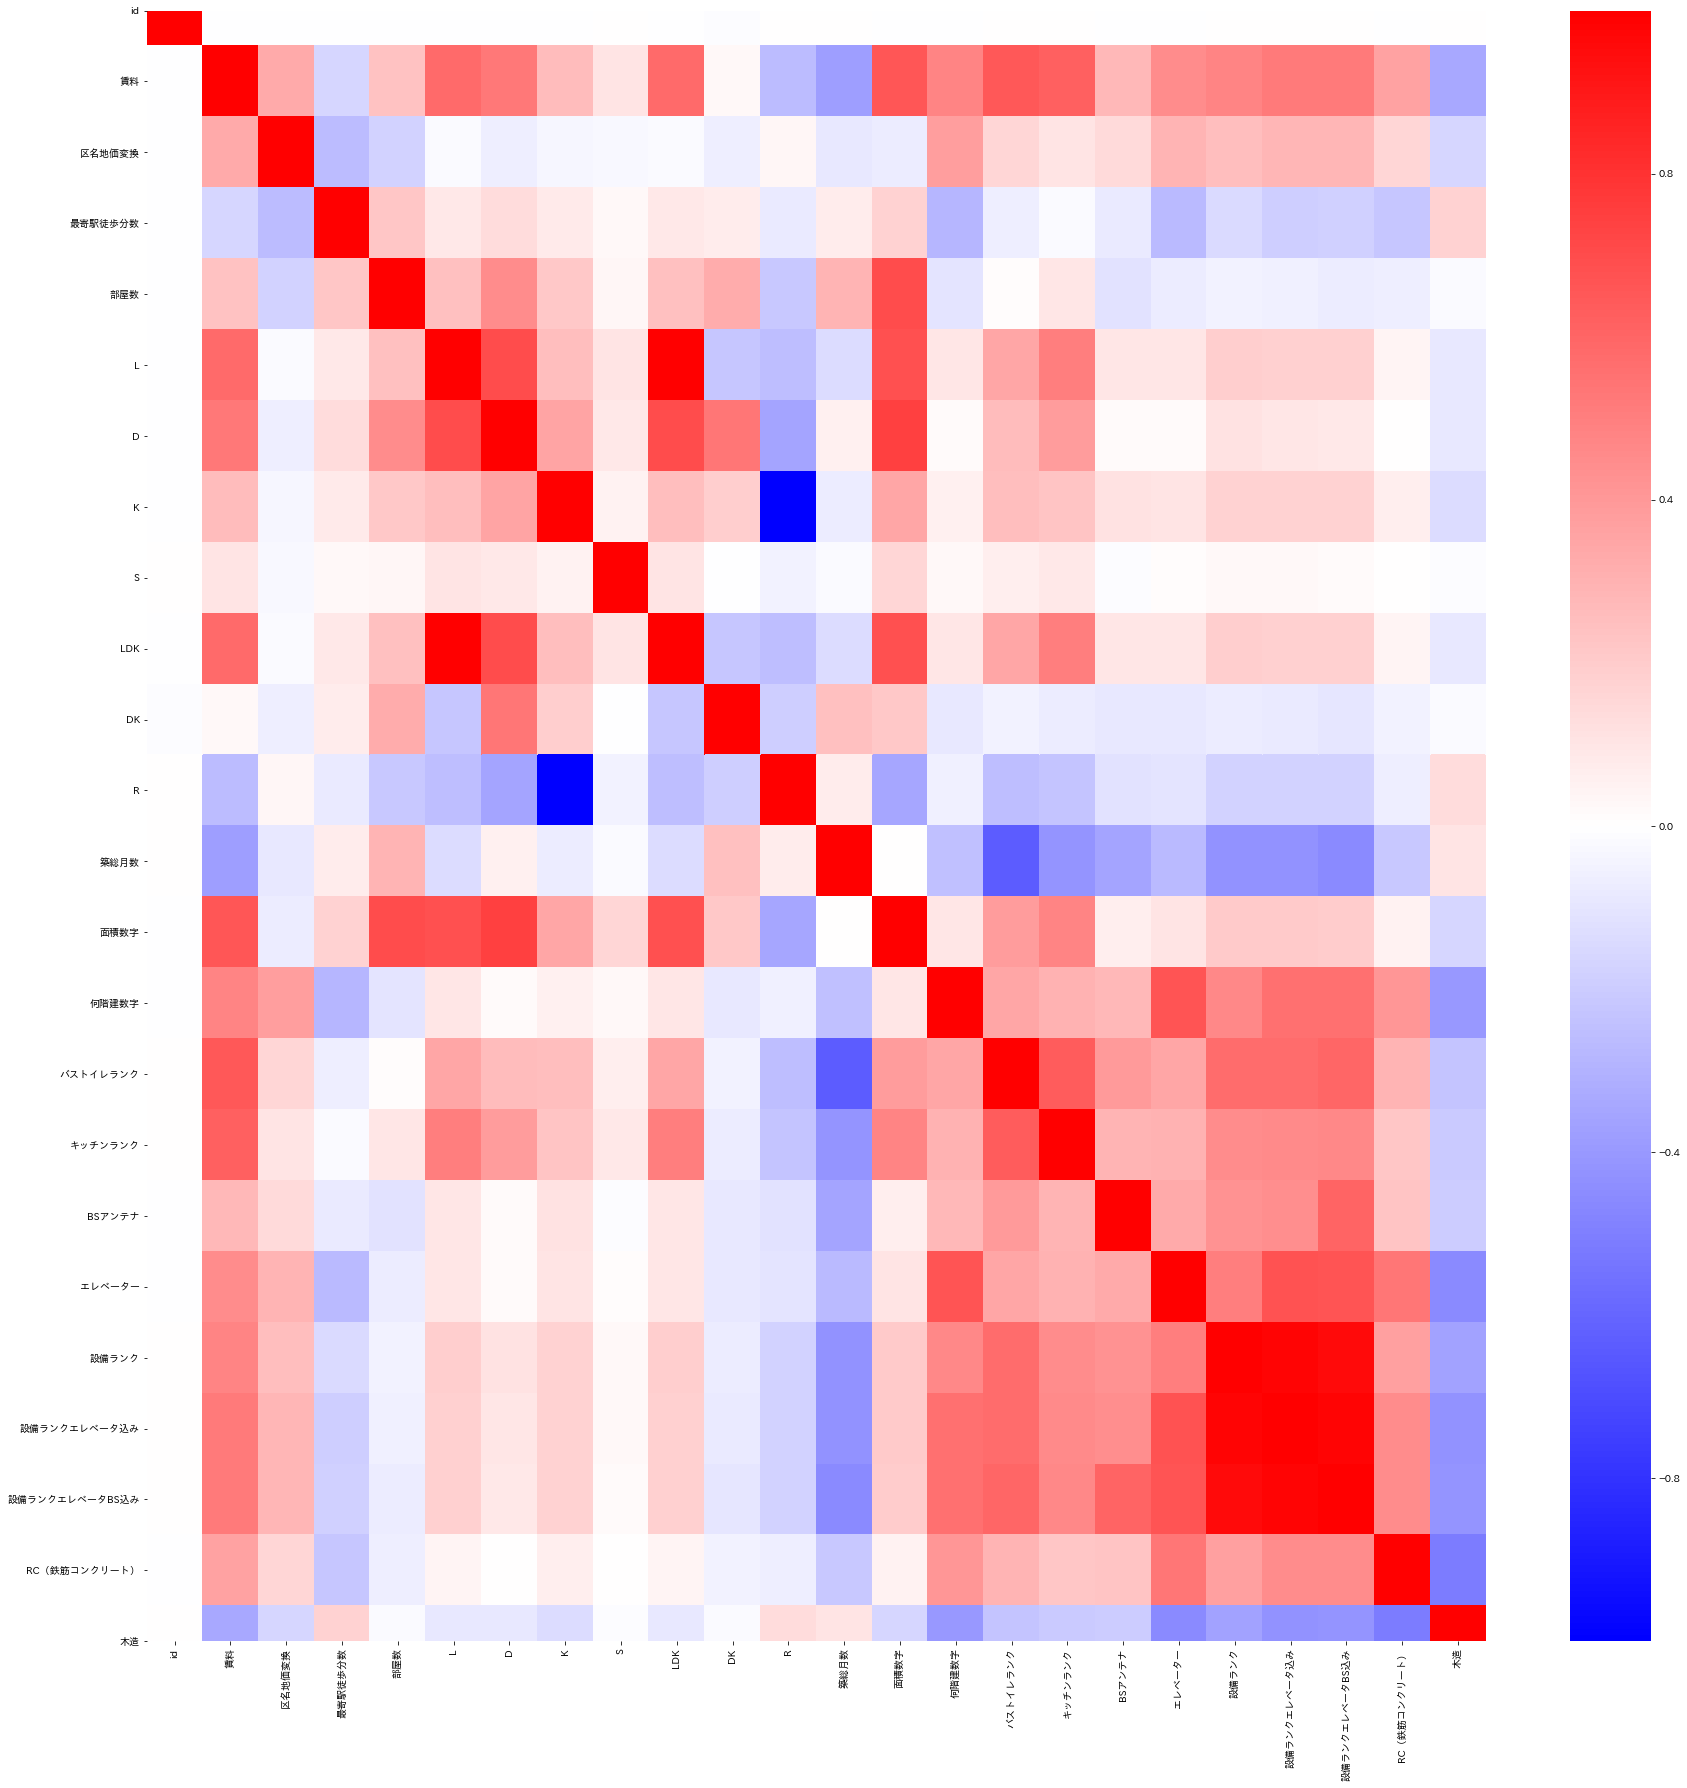

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, cmap='bwr')

In [8]:
df

,id,賃料,区名,区名地価変換,最寄駅徒歩分数,部屋数,L,D,K,S,LDK,DK,R,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,BSアンテナ,エレベーター,設備ランク,設備ランクエレベータ込み,設備ランクエレベータBS込み,RC（鉄筋コンクリート）,木造
0,1,75000,北区,68,4,1,0,0,1,0,0,0,0,117,20.01,12,3,1,1,1,4,5,6,1,0
1,2,76000,中央区,610,5,1,0,0,0,0,0,0,1,538,16.50,10,1,1,0,1,5,6,6,0,0
2,3,110000,渋谷区,392,6,1,0,0,1,0,0,0,0,102,22.05,15,5,1,1,1,6,7,8,1,0
3,4,150000,杉並区,69,3,2,1,1,1,0,1,0,0,352,60.48,4,3,0,0,1,3,4,4,1,0
4,5,74000,葛飾区,37,5,2,0,1,1,0,0,1,0,379,39.66,2,2,0,0,0,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28607,31466,80000,板橋区,54,7,2,0,1,1,0,0,1,0,360,37.90,3,3,0,0,0,2,2,2,0,0
28608,31467,54500,世田谷区,71,4,1,0,0,0,0,0,0,1,475,12.04,4,0,-1,0,0,2,2,2,1,0
28609,31468,125000,江東区,62,5,3,0,1,1,0,0,1,0,550,60.00,5,3,0,0,0,3,3,3,0,0
28610,31469,98000,中野区,88,4,1,0,1,1,0,0,1,0,132,29.59,2,2,1,0,0,4,4,4,0,1


不要な列の削除

In [9]:
df = df.drop(['区名', 'S', 'L', 'D', 'R', '部屋数', '設備ランク', 'BSアンテナ', 'エレベーター', '設備ランクエレベータ込み', '設備ランクエレベータBS込み'], axis=1)

In [10]:
df

,id,賃料,区名地価変換,最寄駅徒歩分数,K,LDK,DK,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,RC（鉄筋コンクリート）,木造
0,1,75000,68,4,1,0,0,117,20.01,12,3,1,1,0
1,2,76000,610,5,0,0,0,538,16.50,10,1,1,0,0
2,3,110000,392,6,1,0,0,102,22.05,15,5,1,1,0
3,4,150000,69,3,1,1,0,352,60.48,4,3,0,1,0
4,5,74000,37,5,1,0,1,379,39.66,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28607,31466,80000,54,7,1,0,1,360,37.90,3,3,0,0,0
28608,31467,54500,71,4,0,0,0,475,12.04,4,0,-1,1,0
28609,31468,125000,62,5,1,0,1,550,60.00,5,3,0,0,0
28610,31469,98000,88,4,1,0,1,132,29.59,2,2,1,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28612 entries, 0 to 28611
Data columns (total 14 columns):
id              28612 non-null int64
賃料              28612 non-null int64
区名地価変換          28612 non-null int64
最寄駅徒歩分数         28612 non-null int64
K               28612 non-null int64
LDK             28612 non-null int64
DK              28612 non-null int64
築総月数            28612 non-null int64
面積数字            28612 non-null float64
何階建数字           28612 non-null int64
バストイレランク        28612 non-null int64
キッチンランク         28612 non-null int64
RC（鉄筋コンクリート）    28612 non-null int64
木造              28612 non-null int64
dtypes: float64(1), int64(13)
memory usage: 3.1 MB


データを、学習用train（この後、モデル作成のための学習用model_trainとモデル評価用model_testに分ける）と予測用predict（賃料未知のデータということにしておく）に分割

In [12]:
# 評価用データとして元データからランダムに3000件を抽出
df_predict = df.sample(n=3000, random_state=0)

In [13]:
# 学習用データは元データから評価用データを除いたもの
df_train = df[~df['id'].isin(df_predict['id'])]

In [14]:
# df_xxx_xは目的変数を除去したデータ
df_train_x = df_train.drop(['賃料'], axis=1)

In [15]:
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['賃料']

In [16]:
# df_xxx_xは目的変数を除去したデータ
df_predict_x = df_predict.drop(['賃料'], axis=1)

In [17]:
# df_xxx_yは目的変数のみのデータ
df_predict_y = df_predict['賃料']

In [18]:
# idだけ保持しておく
df_train_team_x = df_train['id']
df_predict_team_x = df_predict['id']

idデータの消去

In [19]:
df_train_x = df_train_x.drop(['id'], axis=1)

In [20]:
df_predict_x = df_predict_x.drop(['id'], axis=1)

In [21]:
df_train_x.head()

,区名地価変換,最寄駅徒歩分数,K,LDK,DK,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,RC（鉄筋コンクリート）,木造
0,68,4,1,0,0,117,20.01,12,3,1,1,0
1,610,5,0,0,0,538,16.50,10,1,1,0,0
2,392,6,1,0,0,102,22.05,15,5,1,1,0
3,69,3,1,1,0,352,60.48,4,3,0,1,0
5,66,2,1,1,0,90,50.80,12,5,2,1,0


標準化する

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
#学習用データ
x_sc_df = StandardScaler()

#元データから平均と分散の算出
x_sc_df.fit(df_train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
#元データを標準化
df_train_x_std = x_sc_df.transform(df_train_x)

In [25]:
#予測用データ
x_sc_df = StandardScaler()

#元データから平均と分析の算出
x_sc_df.fit(df_predict_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
#元データを標準化
df_predict_x_std = x_sc_df.transform(df_predict_x)

In [27]:
df_predict_x_std

array([[ 0.01049094, -0.47640937,  0.45470633, ..., -1.93550552,
         0.91002943, -0.47327604],
       [ 1.87722239,  0.63083274, -2.19922165, ...,  0.28241524,
         0.91002943, -0.47327604],
       [-0.20163764,  0.63083274,  0.45470633, ...,  0.28241524,
         0.91002943, -0.47327604],
       ...,
       [-0.20163764, -0.03351253, -2.19922165, ..., -0.82654514,
         0.91002943, -0.47327604],
       [ 3.41869003, -0.03351253,  0.45470633, ...,  1.39137563,
        -1.09886556, -0.47327604],
       [ 0.30039999, -0.6978578 ,  0.45470633, ..., -1.93550552,
         0.91002943, -0.47327604]])

In [28]:
#目的変数は一行だけなので、公式に当てはめて計算
df_train_y_std = (df_train_y - df_train_y.mean()) / df_train_y.std()
df_predict_y_std = (df_predict_y - df_predict_y.mean()) / df_predict_y.std()

重回帰分析のためのモデル作成

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [31]:
#線形回帰モデルへ当てはめ
linreg.fit(df_train_x_std, df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
df_train_x_std

array([[-0.41070784, -0.71615137,  0.4633599 , ...,  0.29604939,
         0.92488066, -0.47531442],
       [ 3.51391877, -0.49339665, -2.15814965, ...,  0.29604939,
        -1.08122058, -0.47531442],
       [ 1.93537891, -0.27064194,  0.4633599 , ...,  0.29604939,
         0.92488066, -0.47531442],
       ...,
       [-0.38898482, -0.71615137, -2.15814965, ..., -1.90942382,
         0.92488066, -0.47531442],
       [-0.45415389, -0.49339665,  0.4633599 , ..., -0.80668722,
        -1.08122058, -0.47531442],
       [-0.26588767, -0.71615137,  0.4633599 , ...,  0.29604939,
        -1.08122058,  2.10387053]])

In [33]:
df_train_y_std

0       -0.751758
1       -0.724352
2        0.207421
3        1.303625
5        1.577676
           ...   
28605    0.728118
28606    0.125206
28608   -1.313562
28609    0.618497
28610   -0.121440
Name: 賃料, Length: 25612, dtype: float64

In [34]:
test_result = linreg.predict(df_train_x_std)

In [35]:
# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = df_train_y_std * df_train_y.std() + df_train_y.mean()

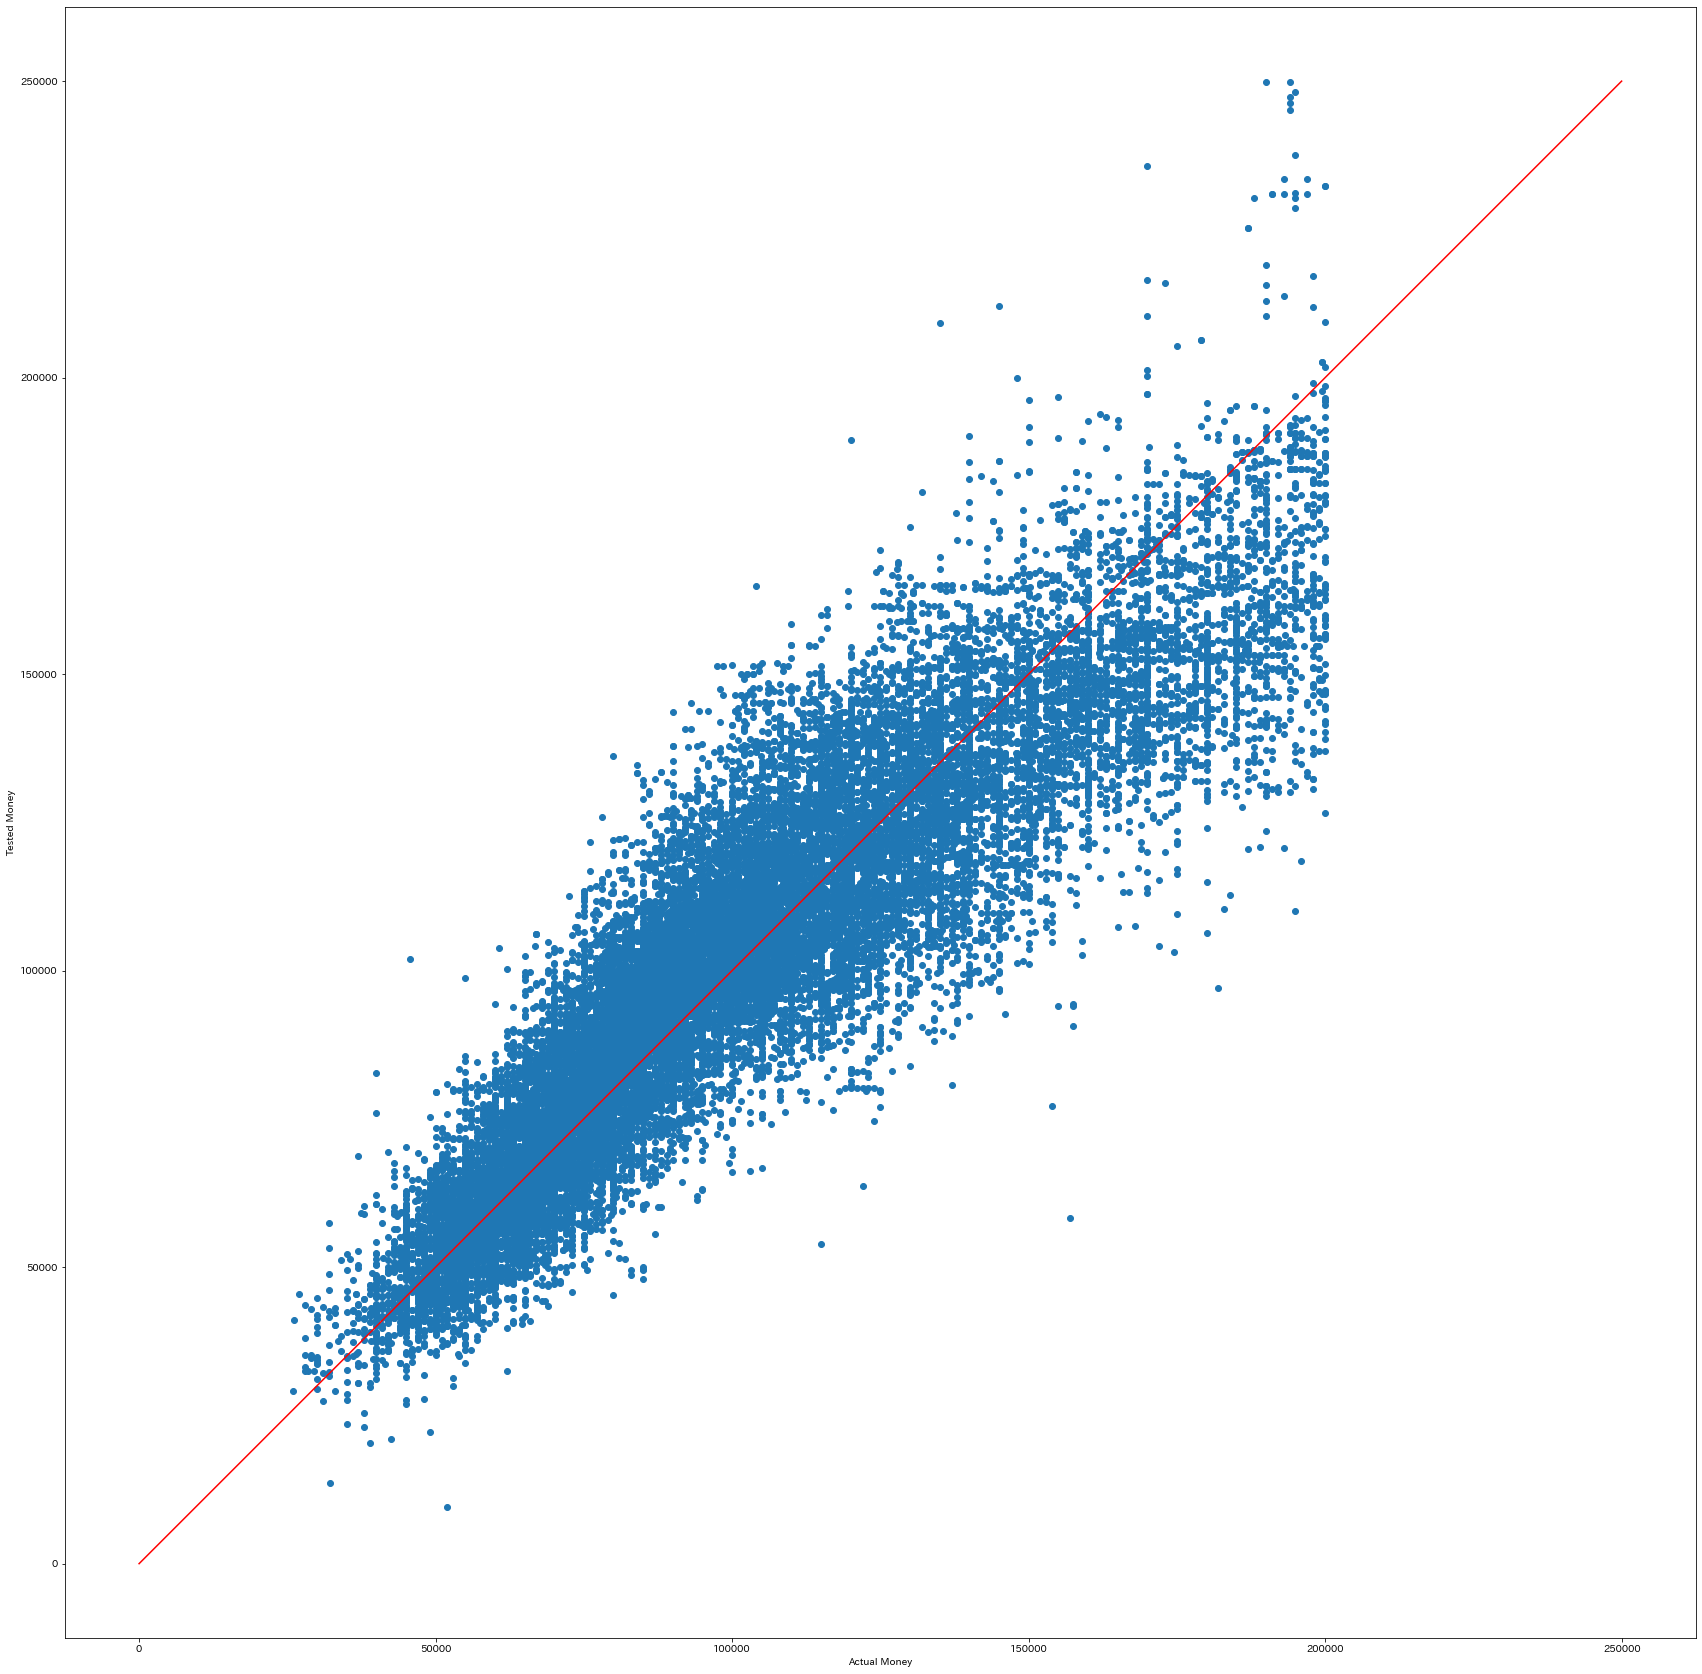

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,30))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Money")
plt.ylabel("Tested Money")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 250000)
y=x
plt.plot(x,y,color="red")

In [37]:
rmse = np.sqrt(sum((y_pred_val - y_test_data_predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  15728.534561929364


In [38]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

木造             -0.010665
K              -0.021161
キッチンランク         0.056427
DK              0.067648
最寄駅徒歩分数        -0.113501
RC（鉄筋コンクリート）    0.114005
バストイレランク        0.140299
何階建数字           0.147671
築総月数           -0.169920
LDK             0.182302
区名地価変換          0.227207
面積数字            0.466441
Name: Coef, dtype: float64

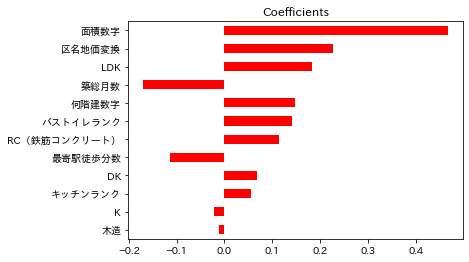

In [39]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(40).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(40)

データ全体に対して、作成したモデルを適用してみる。

In [40]:
df_x_all = df.drop(['賃料', 'id'], axis=1)
df_x_all

,区名地価変換,最寄駅徒歩分数,K,LDK,DK,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,RC（鉄筋コンクリート）,木造
0,68,4,1,0,0,117,20.01,12,3,1,1,0
1,610,5,0,0,0,538,16.50,10,1,1,0,0
2,392,6,1,0,0,102,22.05,15,5,1,1,0
3,69,3,1,1,0,352,60.48,4,3,0,1,0
4,37,5,1,0,1,379,39.66,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28607,54,7,1,0,1,360,37.90,3,3,0,0,0
28608,71,4,0,0,0,475,12.04,4,0,-1,1,0
28609,62,5,1,0,1,550,60.00,5,3,0,0,0
28610,88,4,1,0,1,132,29.59,2,2,1,0,1


In [41]:
df_y_all = df['賃料']
df_y_all

0         75000
1         76000
2        110000
3        150000
4         74000
          ...  
28607     80000
28608     54500
28609    125000
28610     98000
28611     81000
Name: 賃料, Length: 28612, dtype: int64

In [42]:
#学習用データ
x_sc_df = StandardScaler()

#元データから平均と分散の算出
x_sc_df.fit(df_x_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
#元データを標準化
df_x_all_std = x_sc_df.transform(df_x_all)

In [44]:
test_result_all = linreg.predict(df_x_all_std)

In [45]:
# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result_all * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = df_y_all

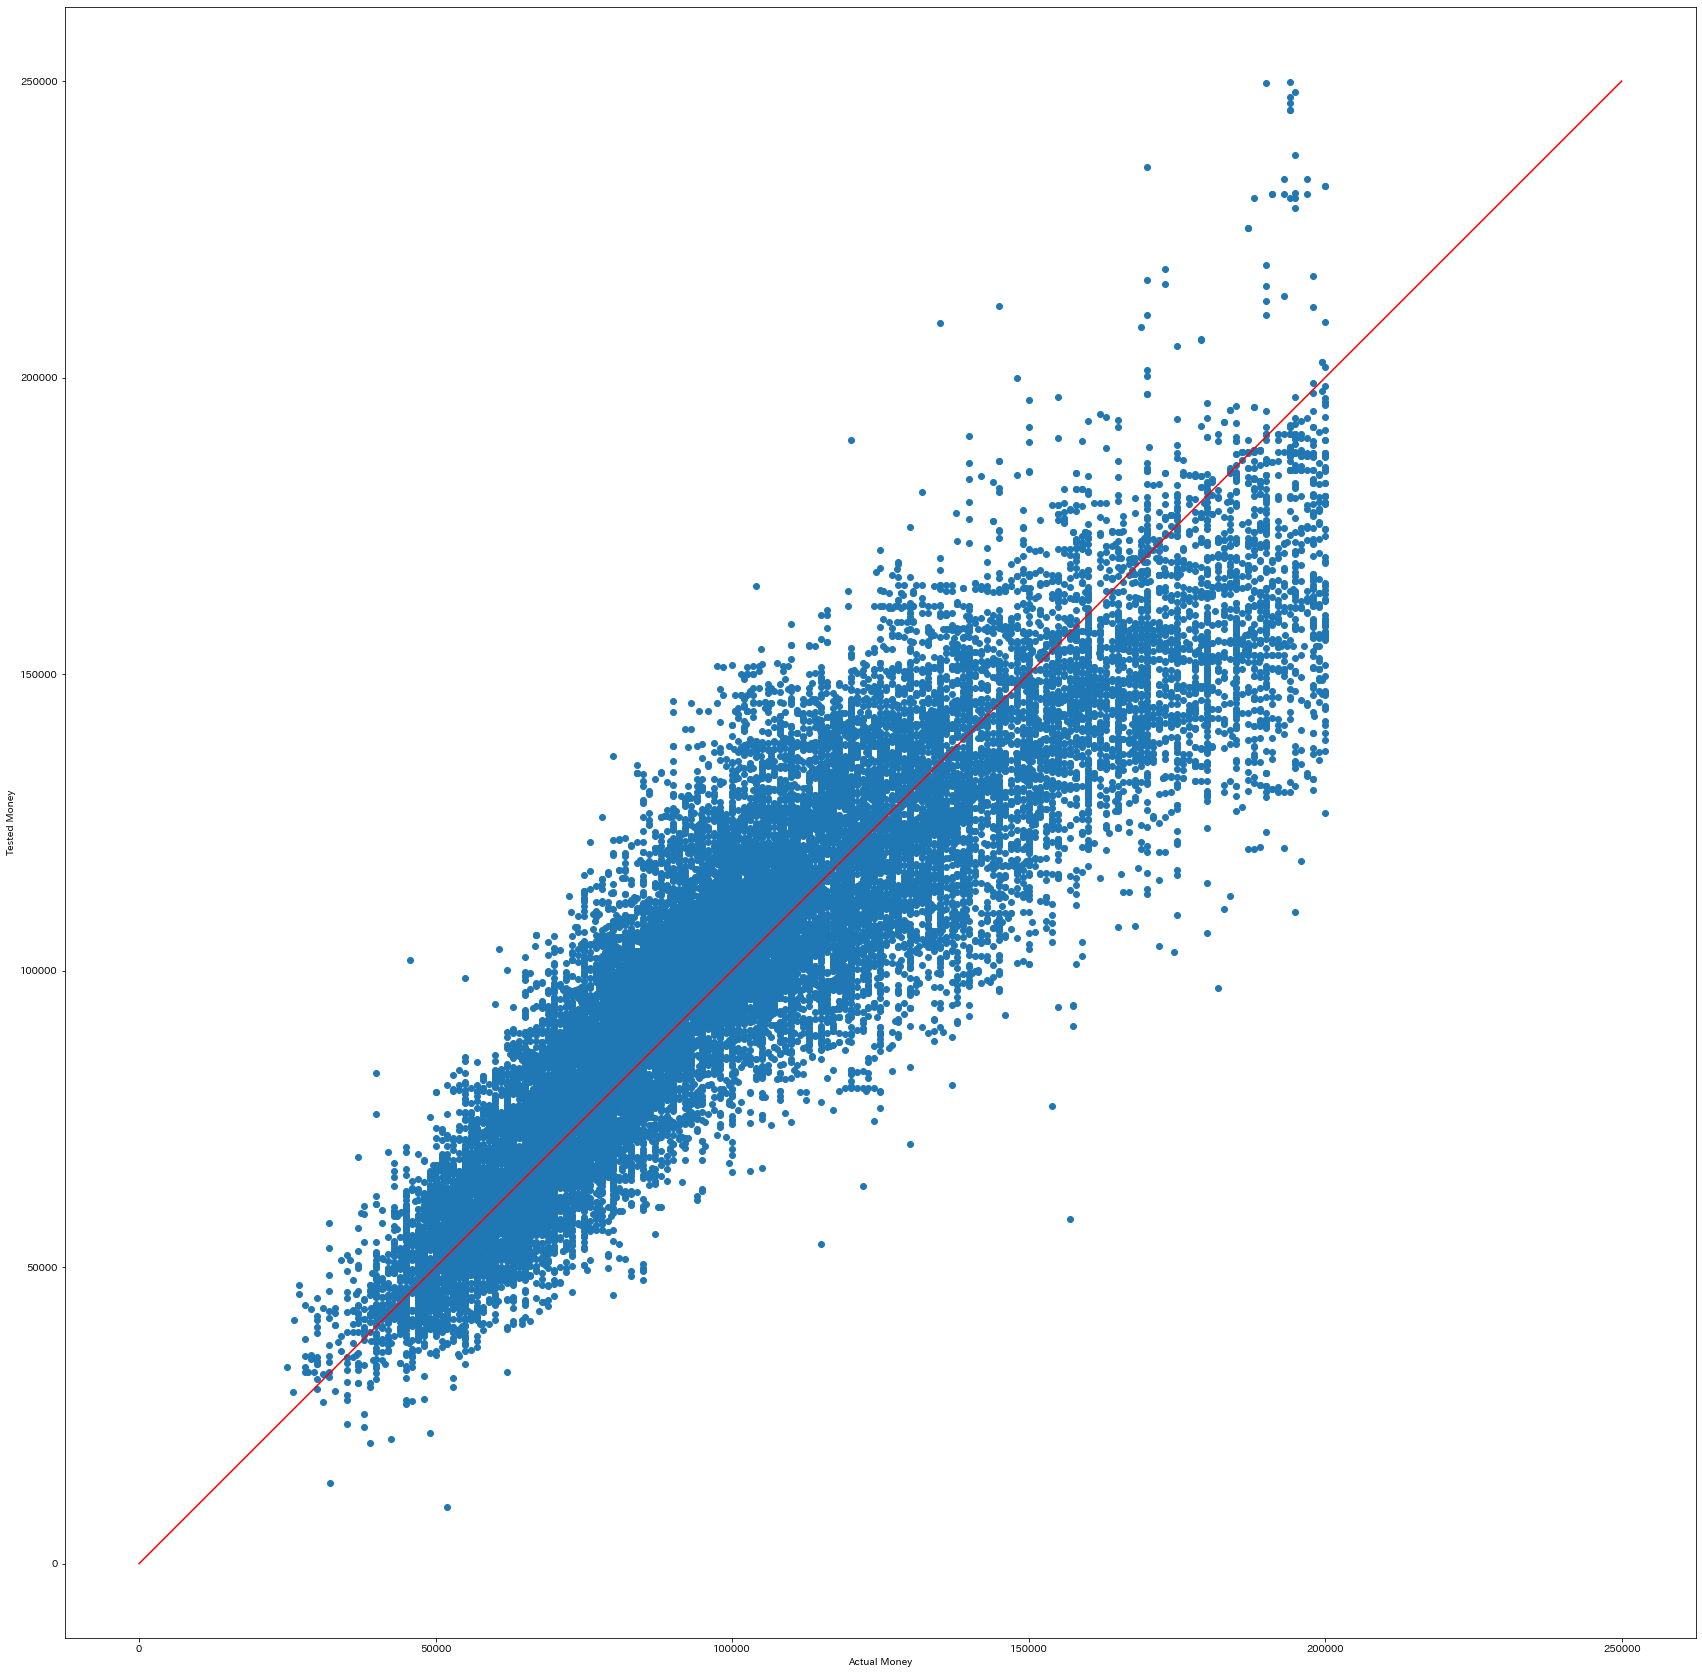

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,30))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Money")
plt.ylabel("Tested Money")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 250000)
y=x
plt.plot(x,y,color="red")

In [47]:
rmse = np.sqrt(sum((y_pred_val - y_test_data_predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  15734.880675163016


木造             -0.010665
K              -0.021161
キッチンランク         0.056427
DK              0.067648
最寄駅徒歩分数        -0.113501
RC（鉄筋コンクリート）    0.114005
バストイレランク        0.140299
何階建数字           0.147671
築総月数           -0.169920
LDK             0.182302
区名地価変換          0.227207
面積数字            0.466441
Name: Coef, dtype: float64

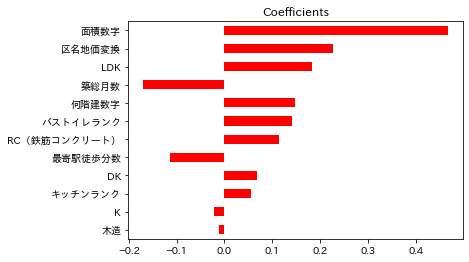

In [48]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(40).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(40)